# Reliability and Data quality (1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from random import *

In [2]:
# Load our dataset into memory

df = pd.read_csv("speeches/data.csv")

In [3]:
# Inespecting the dataset

df.head()

,Name,Date,Speech,Type,Party
0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican
1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican
2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican
3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat
4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat


In [4]:
# Does the number of data point match our expectation?
print(df.shape)

(250, 5)


In [5]:
# The dataframe has 250 rows which corresponds to 108 State of the Union + Inaugural Address Speeches
# The Name,Date,Speech,Type and Party columns do exist as setup in the crawling part.

In [6]:
# Visualizing a random sample of rows of df

df.sample(3)

,Name,Date,Speech,Type,Party
165,James Buchanan,"December 08, 1857",Fellow-Citizens of the Senate and House of Rep...,State of the Union,Democrat
172,Millard Fillmore,"December 06, 1852",Fellow-Citizens of the Senate and of the House...,State of the Union,Whig
47,Gerald Ford,"January 19, 1976","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican


In [7]:
# Visualizing the content of three random speeches (which are only shown partially above):

for i in [1,2,3]:
    print(df.loc[randint(0, 107)]["Speech"])


      
      Mr. Speaker, Mr. President, my colleagues in the Congress, our distinguished guests and my fellow Americans:

To address a joint session of the Congress in this great chamber in which I was once privileged to serve is an honor for which I am deeply grateful.

The State of the Union address is traditionally an occasion for a lengthy and detailed account by the President of what he has accomplished in the past, what he wants the Congress to do in the future, and, in an election year, to lay the basis for the political issues which might be decisive in the fall.

Occasionally there comes a time when profound and far-reaching events command a break with tradition. This is such a time.

I say this not only because 1970 marks the beginning of a new decade in which America will celebrate its 200th birthday. I say it because new knowledge and hard experience argue persuasively that both our programs and our institutions in America need to be reformed.

The moment has arrived to h

In [8]:
# -> Content of the speeches looks fine and complete!

In [9]:
## Count Nan values
df.apply(lambda x: x.isna().sum())

Name      0
Date      0
Speech    0
Type      0
Party     0
dtype: int64

In [10]:
# No Nan values in Name,Date,Speech, Type and Party!

In [11]:
# Inspecting the length of the speeches

length = []

for i in range(0,250):
    print(len(df.loc[i]["Speech"]))
    length.append(len(df.loc[i]["Speech"]))

print("Shortest speech:")
print(min(length))

30686
30237
8399
35236
40282
40027
41225
12427
42219
41713
41914
13340
33728
31854
31392
29834
11969
30587
31873
22605
8974
52328
43549
42211
38884
36314
51188
42032
28550
23238
21387
12486
28360
22080
20205
25109
14599
29473
33012
30925
82386
13716
20185
19693
26623
6880
28354
29707
24825
29190
9925
23063
25742
25353
11531
46993
57600
83226
8075
31628
39060
7539
13917
13599
3005
26178
7591
10566
11015
26273
36484
28940
68731
22995
49890
53917
62404
66076
23614
42340
41118
35240
34240
20242
16044
28416
31305
21971
8300
12673
44654
25321
20459
9451
152745
143134
167471
84456
31713
115300
161658
137808
147175
5493
103756
90113
57637
115732
13244
117976
139284
123389
72518
23324
94529
89440
97316
76372
12175
81670
81567
96719
96593
69450
69334
77749
77608
25863
80973
31558
92407
120474
9999
54751
51770
62451
17774
82240
70873
48350
64893
14715
40675
72995
58626
60145
7618
61129
38703
51945
45847
6403
60552
71566
44076
53990
3922
35389
36967
49881
41394
20999
84031
73919
98265
81805
16574


In [22]:
# Taking the shortest speech (row 107): 

df.loc[249]["Speech"]

# and verifying with the text on millercenter.org website:
# https://millercenter.org/the-presidency/presidential-speeches/april-30-1789-first-inaugural-address

'Fellow Citizens of the Senate and the House of Representatives: Among the vicissitudes incident to life, no event could have filled me with   greater anxieties than that of which the notification was transmitted by your   order, and received on the fourteenth day of the present month. On the one hand,   I was summoned by my Country, whose voice I can never hear but with veneration   and love, from a retreat which I had chosen with the fondest predilection, and,   in my flattering hopes, with an immutable decision, as the asylum of my declining   years: a retreat which was rendered every day more necessary as well as more   dear to me, by the addition of habit to inclination, and of frequent interruptions   in my health to the gradual waste committed on it by time. On the other hand,   the magnitude and difficulty of the trust to which the voice of my Country called   me, being sufficient to awaken in the wisest and most experienced of her citizens,   a distrustful scrutiny into his qu

In [15]:
# -> both texts are identical!

# Reliability and Data quality (2)

In [23]:
# Load the LOG

log_df = pd.read_csv('log_sotu.csv',sep=';') # load the ;-separated log 

In [24]:
# Convert the time column 't' to datetime 

log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

C:\Users\fleig\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Scraping progress')

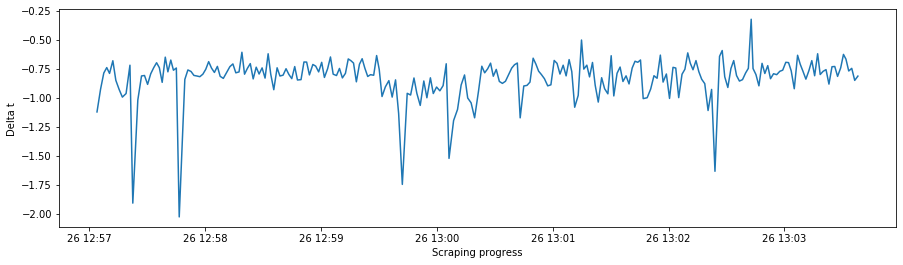

In [25]:
# Plot the time it took to make the call

plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

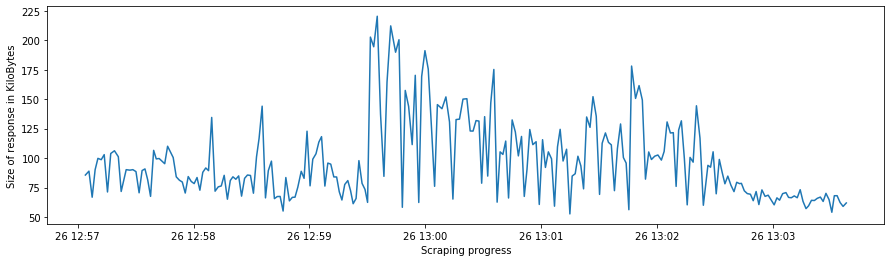

In [34]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response in KiloBytes')
plt.xlabel('Scraping progress')
plt.plot(log_df.dt,log_df.response_size/1000)

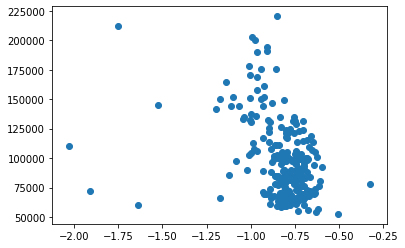

In [29]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_df.delta_t,log_df.response_size)

# -> no clear correlation visible in this case, which might be since download size is not very big

In [35]:
## Investigate errors
log_df.success.value_counts() ## Count errors

print(log_df.success.value_counts())

# -> no errors, all 250 downloads (all True) passed through successfully

## Groupby time
# round the time for aggregation
log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))

print(log_df.groupby('dt_hour').success.mean())



True    250
Name: success, dtype: int64
dt_hour
2019-08-26 12:00:00.000000006    True
2019-08-26 12:00:00.000000020    True
2019-08-26 12:00:00.000000044    True
2019-08-26 12:00:00.000000049    True
2019-08-26 12:00:00.000000057    True
2019-08-26 12:00:00.000000074    True
2019-08-26 12:00:00.000000100    True
2019-08-26 12:00:00.000000102    True
2019-08-26 12:00:00.000000103    True
2019-08-26 12:00:00.000000106    True
2019-08-26 12:00:00.000000112    True
2019-08-26 12:00:00.000000114    True
2019-08-26 12:00:00.000000117    True
2019-08-26 12:00:00.000000123    True
2019-08-26 12:00:00.000000124    True
2019-08-26 12:00:00.000000127    True
2019-08-26 12:00:00.000000163    True
2019-08-26 12:00:00.000000165    True
2019-08-26 12:00:00.000000181    True
2019-08-26 12:00:00.000000199    True
2019-08-26 12:00:00.000000205    True
2019-08-26 12:00:00.000000227    True
2019-08-26 12:00:00.000000234    True
2019-08-26 12:00:00.000000245    True
2019-08-26 12:00:00.000000282    True
20